- Day 47 : 21/04/08
- https://www.kaggle.com/ash316/novice-to-grandmaster

# Novice to Grandmaster

## Introduction

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from imageio import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output

In [11]:
response = pd.read_csv('../input/multipleChoiceResponses.csv',encoding='ISO-8859-1')

In [12]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Some Basic Analysis

In [13]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


정말일까? 가장 나이가 어린 응답자가 한 살도 안 되었고, 가장 나이가 많은 사람이 100세다. 이것은 가짜 응답일 수도 있다.

### Gender Split

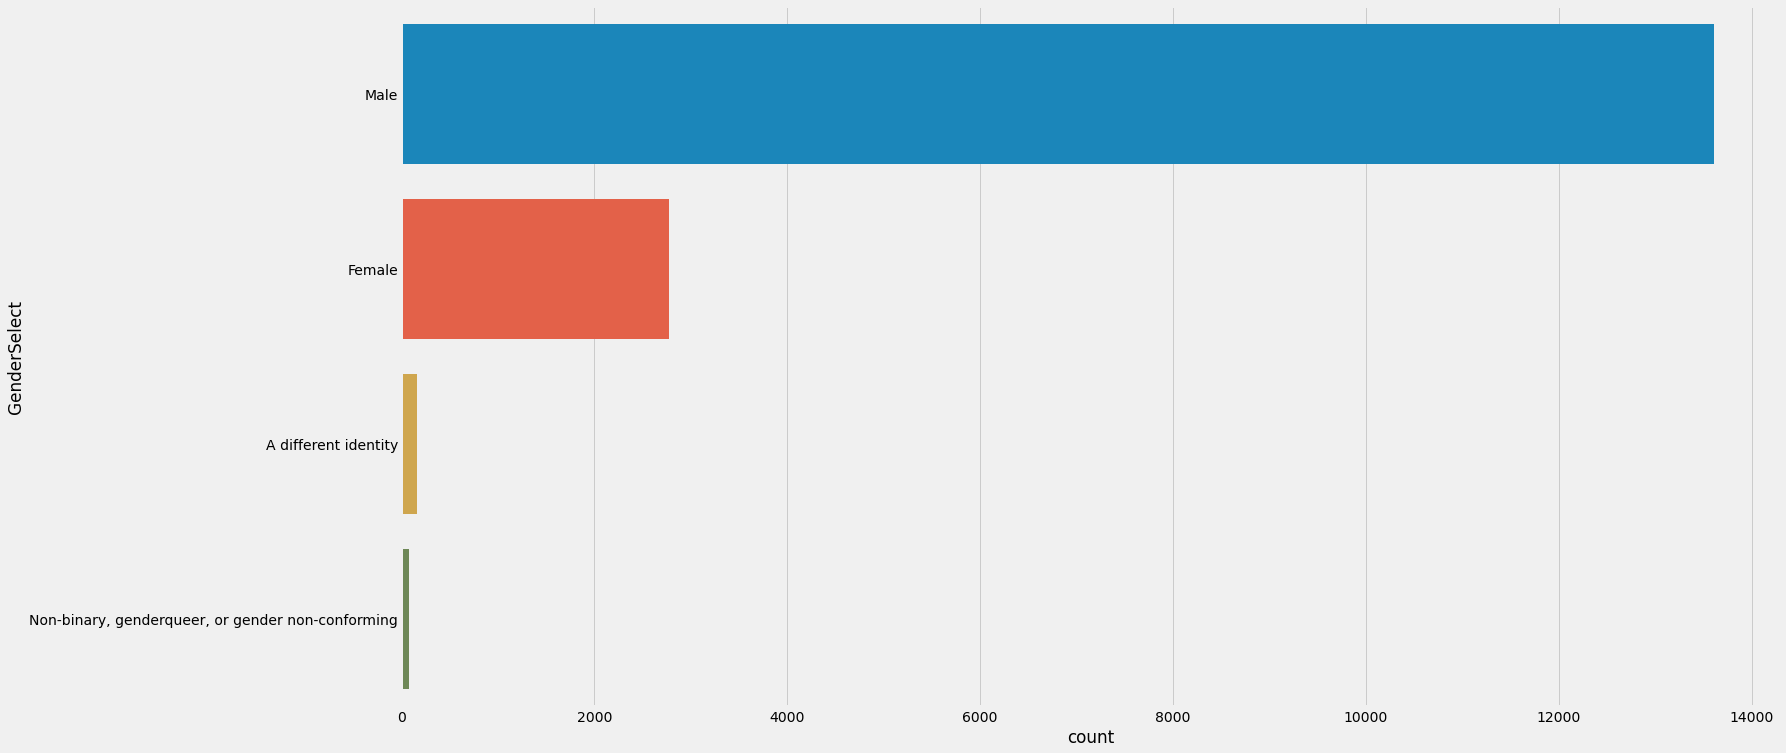

In [14]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'], order=response['GenderSelect'].value_counts().index)
plt.show()

그래프에서 여성에 비해 남성 응답자가 훨씬 많다는 것을 분명히 볼 수 있다.

### Respondents By Country

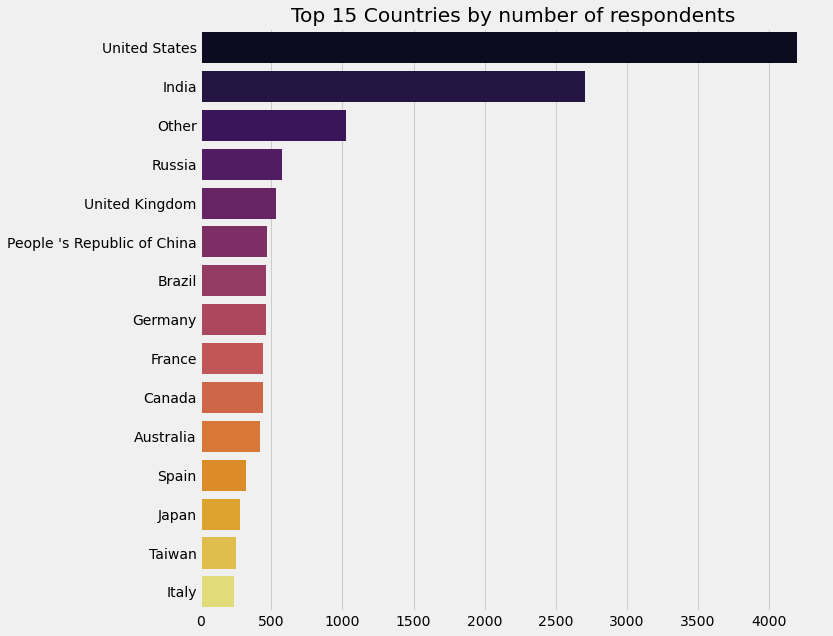

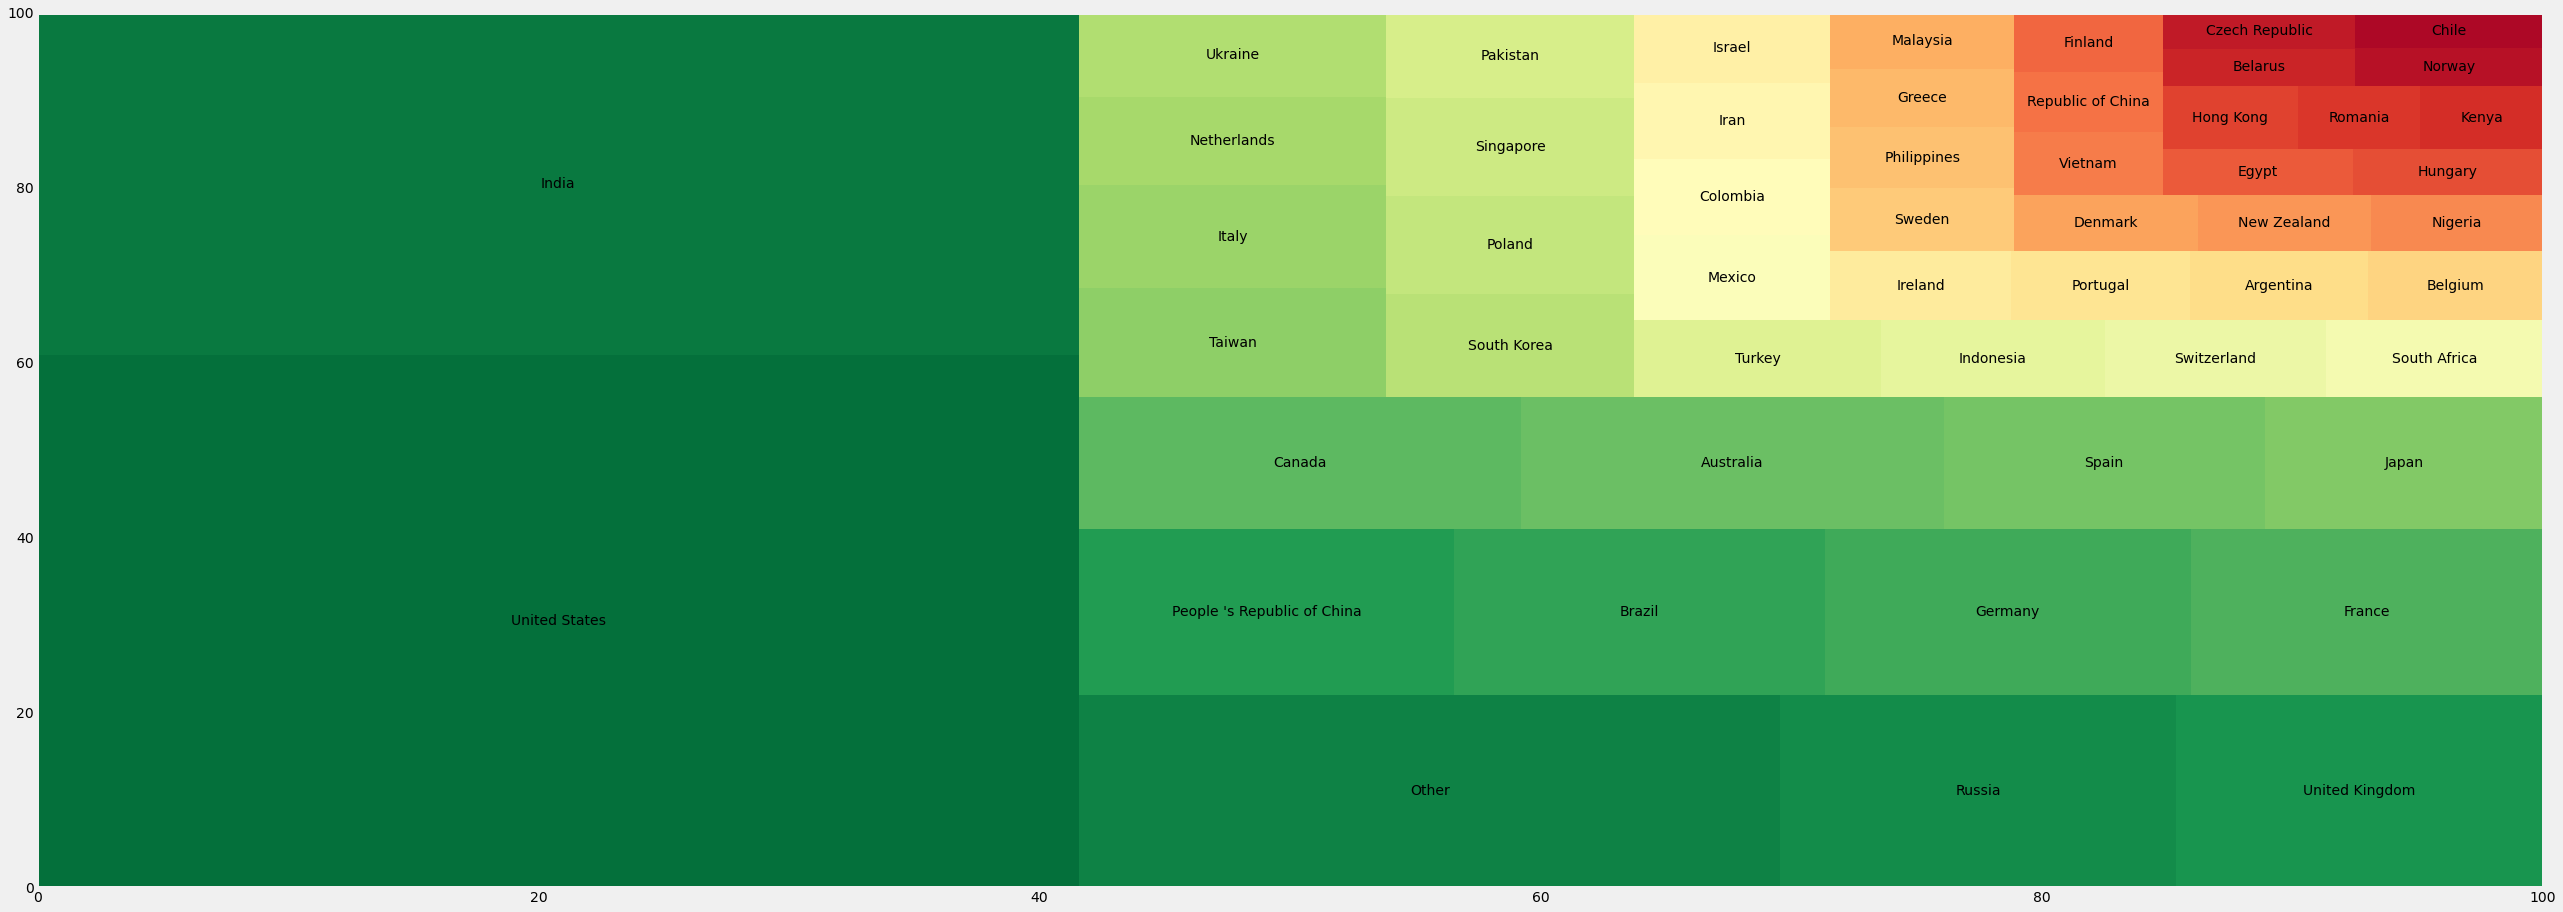

In [16]:
resp_coun = response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'], resp_coun.index, palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

tree = response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values, label=tree.index, color=sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size':20})
fig = plt.gcf()
fig.set_size_inches(40,15)
plt.show()

미국과 인도는 전체 응답자 중 약 1/3을 차지한다. 칠레는 응답자 수가 가장 적다. 이 그래프는 Kaggle 사용자의 대다수가 미국과 인도 출신이라고 말할 수 있을 정도로 충분한가? Kaggle의 총 사용자는 100만 명 이상이고 응답자 수는 1만6천 명에 불과하기 때문에 그렇지 않다.

### Compensation

데이터 사이언티스트는 가장 높은 급여를 받는 사람 중 하나다. 조사원이 뭐라고 하는지 확인해보자.

In [17]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

rates=pd.read_csv('../input/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


터무니 없다. 심지어 많은 나라의 GDP보다 더 크다. 거짓 응답의 또 다른 예시다. 최저 급여는 학생의 경우일 수 있다. 급여의 중위수는 데이터 사이언티스트가 급여 혜택이 좋음을 알 수 있다.

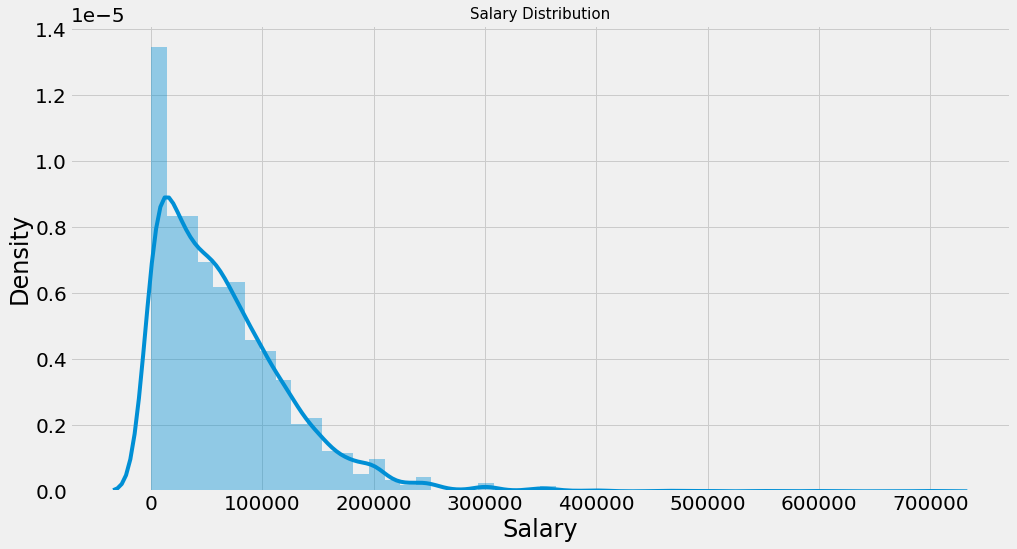

In [18]:
plt.subplots(figsize=(15,8))
salary = salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution', size=15)
plt.show()

#### compensation by Country

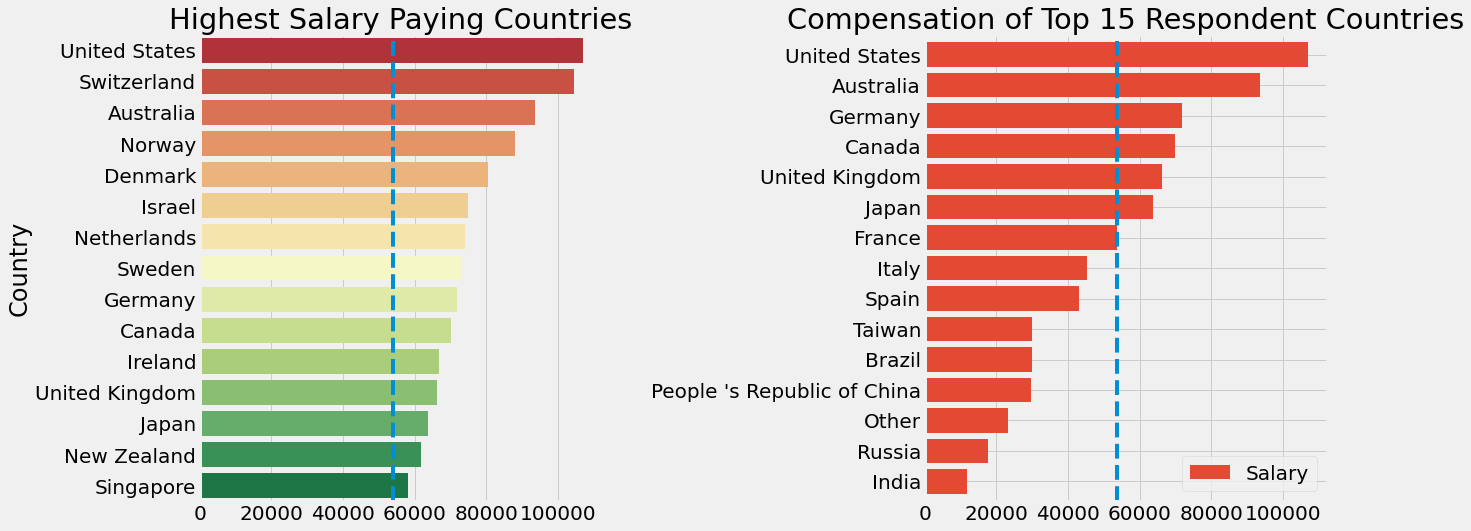

In [20]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun = salary.groupby('Country')['Salary'].median().to_frame()
max_coun = max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

좌측 그래프는 급여 중위수의 상위 15개국을 보여준다. 이러한 국가들이 전체 데이터셋의 급여 중위수보다 더 많은 급여를 제공하고 있음을 볼 수 있다. 마찬가지로 우측 그래프는 응답자 수의 상위 15개국의 급여 중위수를 보여준다. 인도는 응답자 수가 두 번째로 높지만 급여 중위수는 그래프에서 가장 낮다. 미국인들은 인도인들보다 거의 10배나 많은 월급을 받는다. 이유가 뭘까? 이건 나중에 확인해보자.

#### Salary by Gender

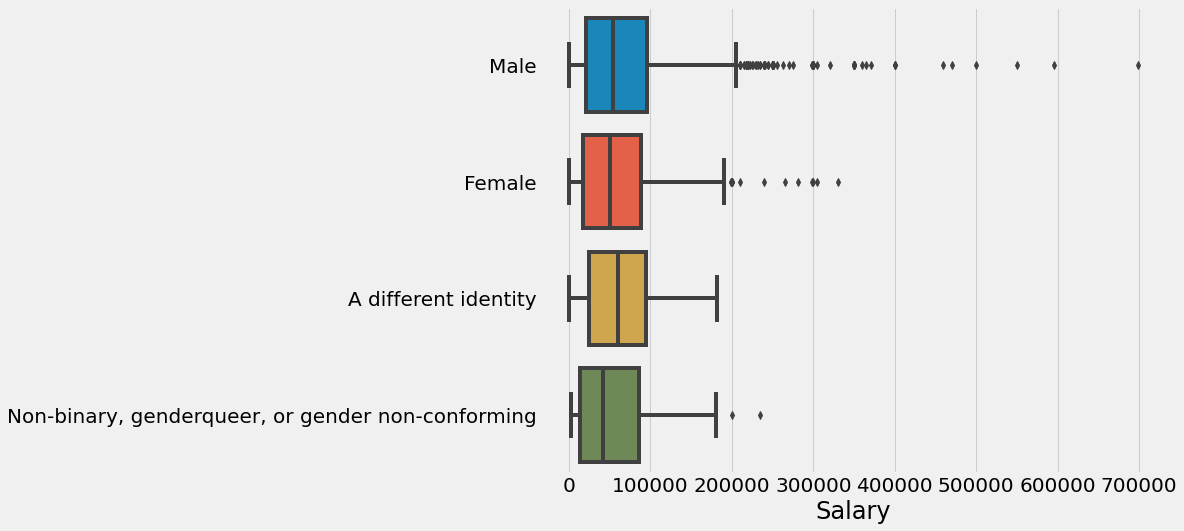

In [21]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)
plt.ylabel('')
plt.show()

남성의 급여는 다른 것들보다 높아 보인다.